In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = np.load('test_output.npz')

In [3]:
data.keys()

['eeg', 'my_conn', 'ethans_conn', 'events', 'resting', 'epochs']

In [4]:
print(data['my_conn'].shape, data['ethans_conn'].shape)

(125, 125) (125, 125)


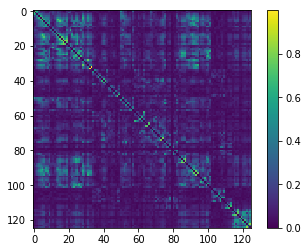

In [5]:
plt.imshow(data['my_conn'], interpolation='none')
plt.colorbar()

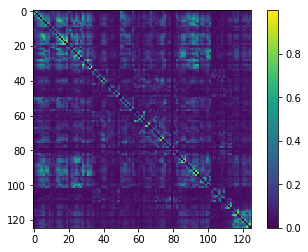

In [6]:
plt.imshow(data['ethans_conn'], interpolation='none')
plt.colorbar()

In [7]:
data['eeg'].shape

(156, 125, 1000)

In [8]:
np.max(data['ethans_conn'] - data['my_conn'])

0.0008643136442730848

In [9]:
t = range(data['eeg'].shape[2])
y = data['eeg'][0,:10]

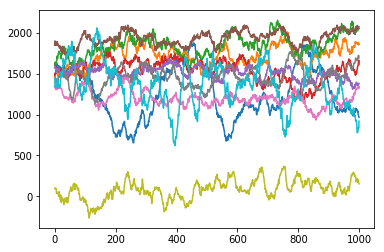

In [10]:
for ch in y:
    plt.plot(t, ch)

## Event comparison

In [11]:
events = pd.DataFrame(data['events'])

In [12]:
data['epochs'].shape

(156, 2)

In [13]:
ethan_events = np.load('/Users/depalati/mnt/rhino/scratch/esolo/tmi_analysis/R1354E/baseline3trials_evs.npy')

In [14]:
np.testing.assert_equal(sorted(data['resting']['eegoffset']), sorted(ethan_events['eegoffset']))

## EEG comparison

In [15]:
ethan_eeg = np.load('/Users/depalati/mnt/rhino/scratch/esolo/tmi_analysis/R1354E/baseline3trials_eeg.npy')

In [16]:
ethan_eeg.shape

(125, 156, 1000)

In [17]:
eeg = data['eeg']

In [18]:
from ipywidgets import interact

In [38]:
events.eegoffset.values

array([ 105581,  212696,  312259,  416191,  517572,  658390,  772256,
        881589,  996472, 1110371, 1242006, 1353304, 1459054, 1581387,
       1698604, 1810937, 1929186, 2029501, 2135181, 2258616, 2368264,
       2478598, 2586729, 2699795, 2801560, 2911025,   32747,  130461,
        236042,  335123,  440637,  542868,  647184,  756432,  880849,
        978695, 1092295, 1195909, 1319776, 1426524, 1528290, 1628371,
       1751954, 1850318, 1970551, 2090186, 2195417, 2307349, 2410479,
       2515893, 2615125, 2721789])

In [46]:
data['resting']['eegoffset']

array([ 106581,  109581,  112581,  213696,  216696,  219696,  313259,
        316259,  319259,  417191,  420191,  423191,  518572,  521572,
        524572,  659390,  662390,  665390,  773256,  776256,  779256,
        882589,  885589,  888589,  997472, 1000472, 1003472, 1111371,
       1114371, 1117371, 1243006, 1246006, 1249006, 1354304, 1357304,
       1360304, 1460054, 1463054, 1466054, 1582387, 1585387, 1588387,
       1699604, 1702604, 1705604, 1811937, 1814937, 1817937, 1930186,
       1933186, 1936186, 2030501, 2033501, 2036501, 2136181, 2139181,
       2142181, 2259616, 2262616, 2265616, 2369264, 2372264, 2375264,
       2479598, 2482598, 2485598, 2587729, 2590729, 2593729, 2700795,
       2703795, 2706795, 2802560, 2805560, 2808560, 2912025, 2915025,
       2918025,   33747,   36747,   39747,  131461,  134461,  137461,
        237042,  240042,  243042,  336123,  339123,  342123,  441637,
        444637,  447637,  543868,  546868,  549868,  648184,  651184,
        654184,  757

In [47]:
@interact(event=(0, eeg.shape[0] - 1, 1),
          channel=(0, eeg.shape[1] - 1, 1))
def compare(event, channel):
    args =np.argsort(data['resting']['eegoffset'])
    eargs = np.argsort(ethan_events['eegoffset'])
    plt.plot(eeg[args, :, :][event, channel, :])
    plt.plot(ethan_eeg[:, eargs, :][channel, event, :])

interactive(children=(IntSlider(value=77, description='event', max=155), IntSlider(value=62, description='chan…

In [33]:
np.argsort(ethan_events['eegoffset'])

array([ 26,  78, 130,   0,  52, 104,  27,  79, 131,   1,  53, 105,  28,
        80, 132,   2,  54, 106,  29,  81, 133,   3,  55, 107,  30,  82,
       134,   4,  56, 108,  31,  83, 135,  32,  84, 136,   5,  57, 109,
        33,  85, 137,   6,  58, 110,  34,   7,  86,  59, 138, 111,  35,
        87, 139,   8,  60, 112,  36,  88, 140,   9,  61, 113,  37,  89,
       141,  10,  62, 114,  38,  90, 142,  11,  63, 115,  39,  91, 143,
        12,  64, 116,  40,  92, 144,  13,  65, 117,  41,  93, 145,  14,
        66, 118,  42,  94, 146,  15,  67, 119,  43,  95, 147,  16,  68,
       120,  44,  96, 148,  17,  69, 121,  45,  97, 149,  18,  70, 122,
        46,  98, 150,  19,  71, 123,  47,  99, 151,  20,  72, 124,  48,
       100, 152,  21,  73, 125,  49, 101, 153,  22,  74, 126,  50, 102,
       154,  23,  75, 127,  51, 103, 155,  24,  76, 128,  25,  77, 129])

In [20]:
ethan_events[:2]['eegoffset']

array([106581, 213696])

In [21]:
events[:2]['eegoffset']

0    105581
1    212696
Name: eegoffset, dtype: int64

In [22]:
ethan_events[-1]['eegoffset']

2728789

In [23]:
events.iloc[-1]['eegoffset']

2721789

In [27]:
ethan_events['eegoffset']

array([ 106581,  213696,  313259,  417191,  518572,  659390,  773256,
        882589,  997472, 1111371, 1243006, 1354304, 1460054, 1582387,
       1699604, 1811937, 1930186, 2030501, 2136181, 2259616, 2369264,
       2479598, 2587729, 2700795, 2802560, 2912025,   33747,  131461,
        237042,  336123,  441637,  543868,  648184,  757432,  881849,
        979695, 1093295, 1196909, 1320776, 1427524, 1529290, 1629371,
       1752954, 1851318, 1971551, 2091186, 2196417, 2308349, 2411479,
       2516893, 2616125, 2722789,  109581,  216696,  316259,  420191,
        521572,  662390,  776256,  885589, 1000472, 1114371, 1246006,
       1357304, 1463054, 1585387, 1702604, 1814937, 1933186, 2033501,
       2139181, 2262616, 2372264, 2482598, 2590729, 2703795, 2805560,
       2915025,   36747,  134461,  240042,  339123,  444637,  546868,
        651184,  760432,  884849,  982695, 1096295, 1199909, 1323776,
       1430524, 1532290, 1632371, 1755954, 1854318, 1974551, 2094186,
       2199417, 2311